In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns


from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('vader_lexicon')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
df = pd.read_csv('/content/T20_Worldcup_tweets_file.csv',encoding='latin-1')
df.head()

<ipython-input-3-52569941233d>:2: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/T20_Worldcup_tweets_file.csv',encoding='latin-1')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Prabhudatta Nayak????,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134.0,532.0,6625.0,0.0,22/10/21 23:55,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,"['GuessAndWin', 'T20WorldCup', 'Contest', 'Cri...",Twitter for Android,0.0
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656.0,762.0,5286.0,0.0,22/10/21 23:55,Set a reminder for my upcoming Space! https://...,"['T20WorldCup', 'AUSvSA']",Twitter for Android,0.0
2,T20 World Cup,NaN,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202.0,1097.0,296.0,1.0,22/10/21 23:55,"""We just try to enjoy everything that we do.""\...","['WestIndies', 'T20WorldCup']",Khoros Publishing App,0.0
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125.0,424.0,56.0,0.0,22/10/21 23:54,#Pakistan and #India played each other in open...,"['Pakistan', 'India', 'IND', 'T20WorldCup', 'NZ']",Twitter Web App,0.0
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742.0,1433.0,811.0,0.0,22/10/21 23:49,#Pakistan won't be much of a challenge for #In...,"['Pakistan', 'India', 'Agarkar', 'AjitAgarkar'...",Twitter Web App,0.0


In [ ]:
cnull=df.isnull().sum()
sumnull=df.isnull().sum().sum()
print(cnull)
print("null values",sumnull)

user_name              369
user_location       107294
user_description     30267
user_created             2
user_followers           3
user_friends             3
user_favourites          3
user_verified            3
date                     3
text                     3
hashtags               412
source                   4
is_retweet               4
dtype: int64
null values 138370


In [ ]:
df.drop_duplicates(inplace=True)  # remove duplicates
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Prabhudatta Nayak????,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134.0,532.0,6625.0,0.0,22/10/21 23:55,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,"['GuessAndWin', 'T20WorldCup', 'Contest', 'Cri...",Twitter for Android,0.0
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656.0,762.0,5286.0,0.0,22/10/21 23:55,Set a reminder for my upcoming Space! https://...,"['T20WorldCup', 'AUSvSA']",Twitter for Android,0.0
2,T20 World Cup,NaN,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202.0,1097.0,296.0,1.0,22/10/21 23:55,"""We just try to enjoy everything that we do.""\...","['WestIndies', 'T20WorldCup']",Khoros Publishing App,0.0
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125.0,424.0,56.0,0.0,22/10/21 23:54,#Pakistan and #India played each other in open...,"['Pakistan', 'India', 'IND', 'T20WorldCup', 'NZ']",Twitter Web App,0.0
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742.0,1433.0,811.0,0.0,22/10/21 23:49,#Pakistan won't be much of a challenge for #In...,"['Pakistan', 'India', 'Agarkar', 'AjitAgarkar'...",Twitter Web App,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430378,Sai sreekar,"Hyderabad, India",Cricketer | Book Reader | Sports Enthusiast | ...,2012-07-07 10:12:05,405.0,85.0,47305.0,FALSE,2021-12-22 12:41:41,Mitchell marsh is in the Form of his life. His...,"['T20WorldCup', 'MitchellMarsh', 'Marsh', 'Big...",Twitter for iPhone,FALSE
430379,green shirts ??????,NaN,Cricket ?? Memes ?? | \n\n@therealpcb ????????...,2021-01-05 18:26:34,147.0,442.0,1216.0,FALSE,2021-12-22 11:37:08,Ramiz Raja said Methew Hayden has made himself...,"['T20WorldCup', 'T20WorldCup2022', 'TeamPakist...",Twitter for Android,FALSE
430380,Tentaran Sports,"New Delhi, India",#SAvIND #IPL2022 #CSK #DC #SRH #MI #KKR #RR #P...,2018-11-28 06:13:27,1066.0,652.0,7583.0,FALSE,2021-12-22 11:30:04,Most Runs in WTC\n.\n.\n.\n#INDvSA #saddapunja...,"['INDvSA', 'saddapunjab', 'pbks', 'ipl2022', '...",Hootsuite Inc.,FALSE
430381,Waqar Ahmed,"Rawalpindi, Pakistan",Sab Maya Hai !,2013-10-04 05:00:03,413.0,402.0,38656.0,FALSE,2021-12-22 10:40:37,@ICC The guy who left his teammates in the mid...,"['T20WorldCup', 'loser']",Twitter for Android,FALSE


In [ ]:
df['source'] = df.source.str.slice(0, 10)
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Prabhudatta Nayak????,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134.0,532.0,6625.0,0.0,22/10/21 23:55,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,"['GuessAndWin', 'T20WorldCup', 'Contest', 'Cri...",Twitter fo,0.0
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656.0,762.0,5286.0,0.0,22/10/21 23:55,Set a reminder for my upcoming Space! https://...,"['T20WorldCup', 'AUSvSA']",Twitter fo,0.0
2,T20 World Cup,NaN,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202.0,1097.0,296.0,1.0,22/10/21 23:55,"""We just try to enjoy everything that we do.""\...","['WestIndies', 'T20WorldCup']",Khoros Pub,0.0
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125.0,424.0,56.0,0.0,22/10/21 23:54,#Pakistan and #India played each other in open...,"['Pakistan', 'India', 'IND', 'T20WorldCup', 'NZ']",Twitter We,0.0
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742.0,1433.0,811.0,0.0,22/10/21 23:49,#Pakistan won't be much of a challenge for #In...,"['Pakistan', 'India', 'Agarkar', 'AjitAgarkar'...",Twitter We,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430378,Sai sreekar,"Hyderabad, India",Cricketer | Book Reader | Sports Enthusiast | ...,2012-07-07 10:12:05,405.0,85.0,47305.0,FALSE,2021-12-22 12:41:41,Mitchell marsh is in the Form of his life. His...,"['T20WorldCup', 'MitchellMarsh', 'Marsh', 'Big...",Twitter fo,FALSE
430379,green shirts ??????,NaN,Cricket ?? Memes ?? | \n\n@therealpcb ????????...,2021-01-05 18:26:34,147.0,442.0,1216.0,FALSE,2021-12-22 11:37:08,Ramiz Raja said Methew Hayden has made himself...,"['T20WorldCup', 'T20WorldCup2022', 'TeamPakist...",Twitter fo,FALSE
430380,Tentaran Sports,"New Delhi, India",#SAvIND #IPL2022 #CSK #DC #SRH #MI #KKR #RR #P...,2018-11-28 06:13:27,1066.0,652.0,7583.0,FALSE,2021-12-22 11:30:04,Most Runs in WTC\n.\n.\n.\n#INDvSA #saddapunja...,"['INDvSA', 'saddapunjab', 'pbks', 'ipl2022', '...",Hootsuite,FALSE
430381,Waqar Ahmed,"Rawalpindi, Pakistan",Sab Maya Hai !,2013-10-04 05:00:03,413.0,402.0,38656.0,FALSE,2021-12-22 10:40:37,@ICC The guy who left his teammates in the mid...,"['T20WorldCup', 'loser']",Twitter fo,FALSE


In [ ]:
# checking all the unique followers in the dataset
print(df['user_followers'].unique())

# checking how many unique language
# tweets are present in the dataset
print(df["text"].unique())

[1.34000e+02 6.56000e+02 3.78202e+05 ... 4.61650e+04 4.86980e+04
 1.78555e+05]
['@ManappuramMAFIL Done Team \n@ManappuramMAFIL \n#GuessAndWin #T20WorldCup #Contest #CricketFever #T20Contest #ExicitingPrizes  #UnlockWithManappuram #ManappuramFinance'
 "Set a reminder for my upcoming Space! https://t.co/NQboUb4oBO Match no 1 of SUPER SATURDAY. toh phir milte hein. update Twitter,no background noise  and one at a time while speaking ??. please ???? #T20WorldCup #AUSvSA  \nLet's get going ????????????????"
 '"We just try to enjoy everything that we do."\n\nThe #WestIndies have two #T20WorldCup trophies to show for their style, and are in no mood to change ??\n\nhttps://t.co/BjuXv6w8vb'
 ...
 'Most Runs in WTC\n.\n.\n.\n#INDvSA #saddapunjab #pbks #ipl2022 #ipl #cricketlover #cricketmerijaan #teamindia #dubai #klrahul #rishabhpant #chennaisuperkings #mumbaiindians #msdhoni #rohitsharma #viratkohli #Ashes #tentaransports #punjabkings #RuturajGaikwad #t20worldcup https://t.co/4CI546W4dZ'
 '@IC

In [ ]:
# before removing the non-english tweets
print(df.shape)

(430381, 13)


In [ ]:
# Removing RT, Punctuation etc
def remove_rt(x): return re.sub('RT @\w+: ', " ", str(x))

def rt(x): return re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(x))

df["text"] = df.text.map(remove_rt).map(rt)
df["text"] = df.text.str.lower()
df['text'][0:10]

0      done team      guessandwin  t20worldcup  con...
1    set a reminder for my upcoming space    match ...
2     we just try to enjoy everything that we do   ...
3     pakistan and  india played each other in open...
4     pakistan won t be much of a challenge for  in...
5    this is exactly what india is going to do to p...
6    am i the only one who waiting for sunday     i...
7        it would be even more dramatic and thrilli...
8        having msd as a mentor for the indian cric...
9    the  saitamawolfpack and  saitama are on fire ...
Name: text, dtype: object

In [ ]:
df.loc[0:9, ['polarity', 'subjectivity']] = df['text'].iloc[0:10].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['text'].iloc[0:10].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"

    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

In [ ]:
df[["text","subjectivity", "neg", "neu", "pos"]].head(10)

,text,subjectivity,neg,neu,pos
0,done team guessandwin t20worldcup con...,NaN,0.000,1.000,0.000
1,set a reminder for my upcoming space match ...,NaN,0.114,0.725,0.161
2,we just try to enjoy everything that we do ...,NaN,0.072,0.822,0.105
3,pakistan and india played each other in open...,NaN,0.101,0.785,0.114
4,pakistan won t be much of a challenge for in...,NaN,0.000,0.750,0.250
5,this is exactly what india is going to do to p...,NaN,0.000,1.000,0.000
6,am i the only one who waiting for sunday i...,NaN,0.000,1.000,0.000
7,it would be even more dramatic and thrilli...,NaN,0.000,0.817,0.183
8,having msd as a mentor for the indian cric...,NaN,0.000,0.782,0.218
9,the saitamawolfpack and saitama are on fire ...,NaN,0.098,0.813,0.089


In [ ]:
total_pos = len(df.loc[df['sentiment'] == "positive"])
total_neg = len(df.loc[df['sentiment'] == "negative"])
total_neu = len(df.loc[df['sentiment'] == "neutral"])
total_tweets = len(df)
print("Total Positive Tweets % : {:.2f}"
      .format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}"
      .format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}"
      .format((total_neu/total_tweets)*100))

Total Positive Tweets % : 0.00
Total Negative Tweets % : 0.00
Total Neutral Tweets % : 0.00


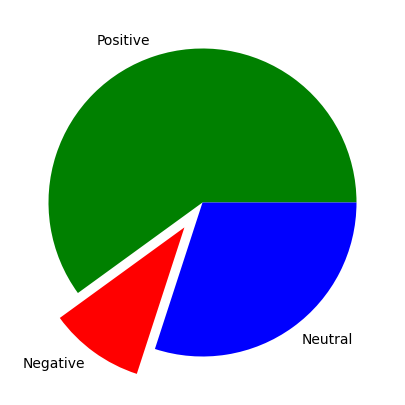

In [ ]:
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]

plt.figure(figsize=(8, 5),
           dpi=100)  # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode)
plt.show()

In [ ]:
pos_list = []
neg_list = []
neu_list = []
for i in df["user_followers"].unique():
	temp = df[df["user_followers"] == i]
	positive_temp = temp[temp["sentiment"] == "positive"]
	negative_temp = temp[temp["sentiment"] == "negative"]
	neutral_temp = temp[temp["sentiment"] == "neutral"]
	pos_list.append(((positive_temp.shape[1]/temp.shape[1])*100, i))
	neg_list.append(((negative_temp.shape[1]/temp.shape[1])*100, i))
	neu_list.append(((neutral_temp.shape[1]/temp.shape[1])*100, i))
neu_list = sorted(neu_list, key=lambda x: x[1])
pos_list = sorted(pos_list, key=lambda x: x[1])
neg_list = sorted(neg_list, key=lambda x: x[1])
x_cord_neg = []
y_cord_neg = []
x_cord_pos = []
y_cord_pos = []
x_cord_neu = []
y_cord_neu = []
for i in neg_list:
	x_cord_neg.append(i[0])
	y_cord_neg.append(i[1])
for i in pos_list:
	x_cord_pos.append(i[0])
	y_cord_pos.append(i[1])
for i in neu_list:
	x_cord_neu.append(i[0])
	y_cord_neu.append(i[1])
plt.figure(figsize=(16, 9),
		dpi=600) # Push new figure on stack
plt.plot(y_cord_neg, x_cord_neg, label="negative",
		color="red")
plt.plot(y_cord_pos, x_cord_pos, label="positive",
		color="green")
plt.plot(y_cord_neu, x_cord_neu, label="neutral",
		color="blue")
plt.xticks(np.arange(0, len(df["date"].unique()) + 1, 5))
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.legend()

In [ ]:
from matplotlib._api import define_aliases
# Removing Punctuation
def remove_punct(text):
	text = "".join([char for char in text if
					char not in string.punctuation])
	text = re.sub('[0-9]+', '', text)
	return text

df['punct'] = df['text'].apply(
lambda x: remove_punct(x))

# Applying tokenization
def tokenization(text):
	text = re.split('\W+', text)
	return text

df['tokenized'] = df['punct'].apply(
	lambda x: tokenization(x.lower()))

# Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
	text = [word for word in text if
			word not in stopword]
	return text

lambda x: remove_stopwords(x)

# Applying Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
	text = [ps.stem(word) for word in text]
	return text
lambda x: stemming(x)

df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,is_retweet,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized
0,Prabhudatta Nayak????,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134.0,532.0,6625.0,0.0,22/10/21 23:55,done team guessandwin t20worldcup con...,...,0.0,NaN,NaN,neutral,0.000,1.000,0.000,0.0000,done team guessandwin tworldcup conte...,"[, done, team, guessandwin, tworldcup, contest..."
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656.0,762.0,5286.0,0.0,22/10/21 23:55,set a reminder for my upcoming space match ...,...,0.0,NaN,NaN,positive,0.114,0.725,0.161,0.4215,set a reminder for my upcoming space match ...,"[set, a, reminder, for, my, upcoming, space, m..."
2,T20 World Cup,NaN,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202.0,1097.0,296.0,1.0,22/10/21 23:55,we just try to enjoy everything that we do ...,...,0.0,NaN,NaN,positive,0.072,0.822,0.105,0.2500,we just try to enjoy everything that we do ...,"[, we, just, try, to, enjoy, everything, that,..."
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125.0,424.0,56.0,0.0,22/10/21 23:54,pakistan and india played each other in open...,...,0.0,NaN,NaN,positive,0.101,0.785,0.114,0.1779,pakistan and india played each other in open...,"[, pakistan, and, india, played, each, other, ..."
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742.0,1433.0,811.0,0.0,22/10/21 23:49,pakistan won t be much of a challenge for in...,...,0.0,NaN,NaN,positive,0.000,0.750,0.250,0.6124,pakistan won t be much of a challenge for in...,"[, pakistan, won, t, be, much, of, a, challeng..."


from matplotlib import pyplot as plt
_df_8['user_followers'].plot(kind='hist', bins=20, title='user_followers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['user_friends'].plot(kind='hist', bins=20, title='user_friends')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['user_favourites'].plot(kind='hist', bins=20, title='user_favourites')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('user_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('user_location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('user_description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('user_created').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='user_followers', y='user_friends', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='user_friends', y='user_favourites', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='user_favourites', y='neg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['user_followers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='user_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('user_followers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['user_followers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user_location')):
  _plot_series(series, series_name, i)
  fig.legend(title='user_location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('user_followers')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['user_followers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user_description')):
  _plot_series(series, series_name, i)
  fig.legend(title='user_description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('user_followers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['user_followers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user_created')):
  _plot_series(series, series_name, i)
  fig.legend(title='user_created', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('user_followers')

from matplotlib import pyplot as plt
_df_24['user_followers'].plot(kind='line', figsize=(8, 4), title='user_followers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['user_friends'].plot(kind='line', figsize=(8, 4), title='user_friends')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['user_favourites'].plot(kind='line', figsize=(8, 4), title='user_favourites')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user_location'].value_counts()
    for x_label, grp in _df_28.groupby('user_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user_name')
_ = plt.ylabel('user_location')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user_description'].value_counts()
    for x_label, grp in _df_29.groupby('user_location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user_location')
_ = plt.ylabel('user_description')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user_created'].value_counts()
    for x_label, grp in _df_30.groupby('user_description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user_description')
_ = plt.ylabel('user_created')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user_verified'].value_counts()
    for x_label, grp in _df_31.groupby('user_created')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user_created')
_ = plt.ylabel('user_verified')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['user_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='user_followers', y='user_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['user_location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='user_followers', y='user_location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['user_description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='user_followers', y='user_description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['user_created'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='user_followers', y='user_created', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Applying Countvectorizer
countVectorizer = CountVectorizer(analyzer='word')
countVector = countVectorizer.fit_transform(df['text'])
count_vect_df = pd.DataFrame(
    countVector.toarray())
  #columns=countVectorizer.get_feature_names())
count_vect_df.head()

# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
                            ascending=False).head(20)
countdf[1:11]

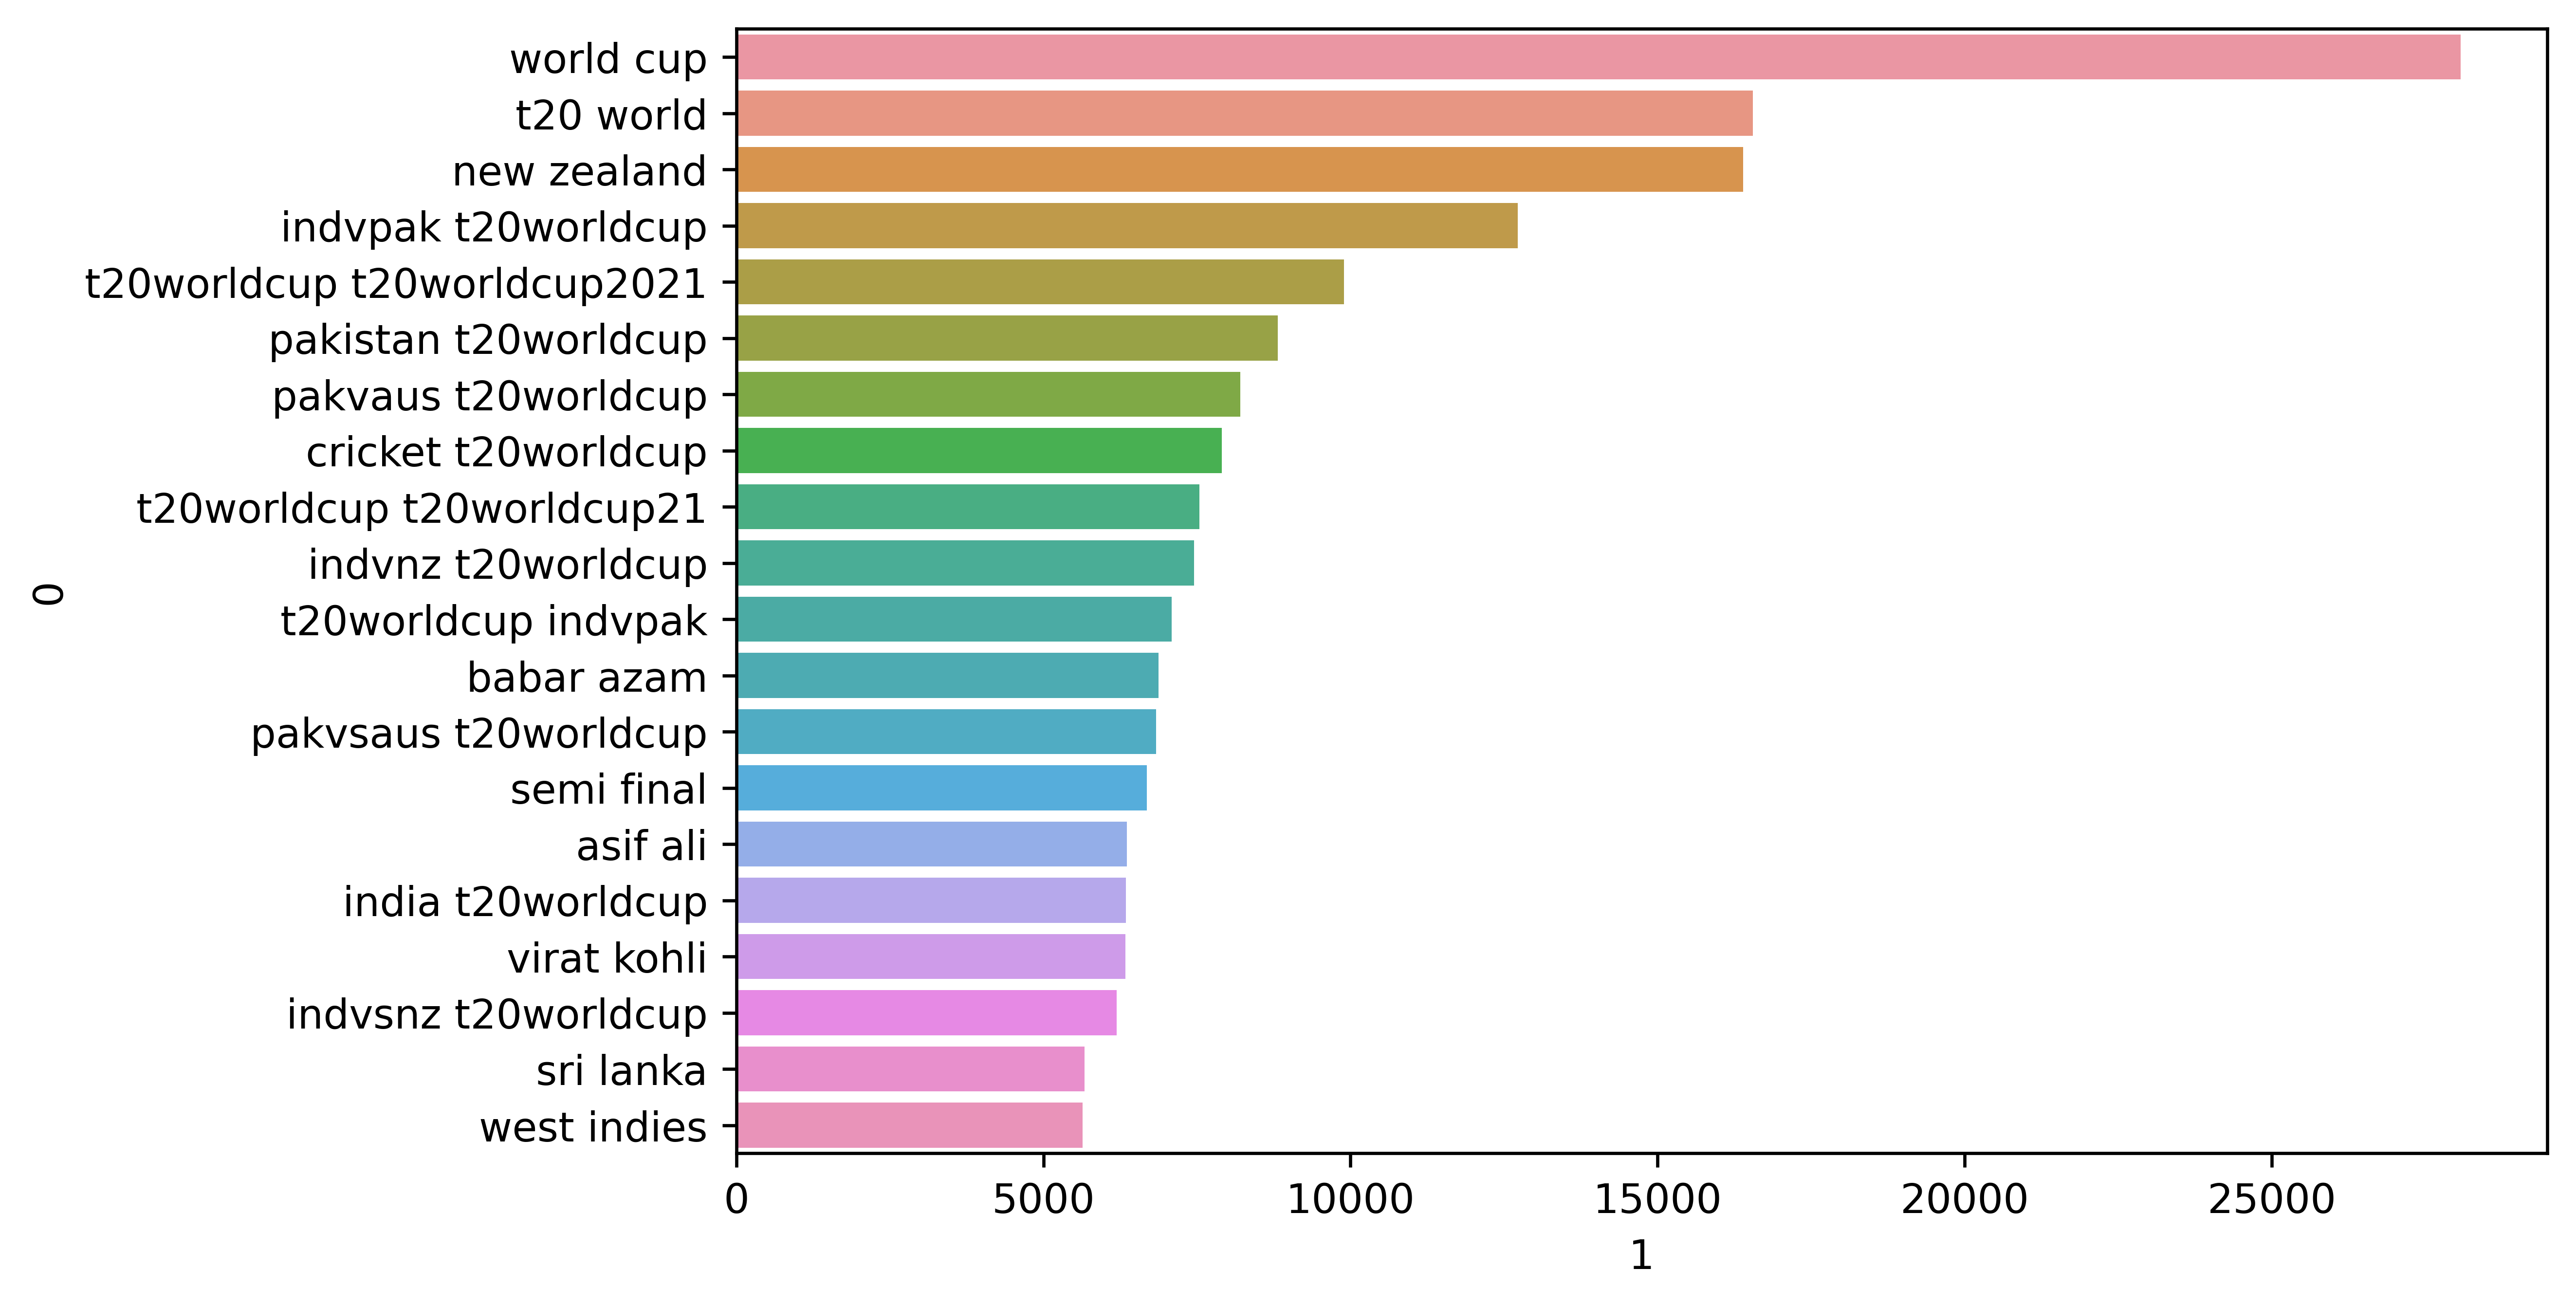

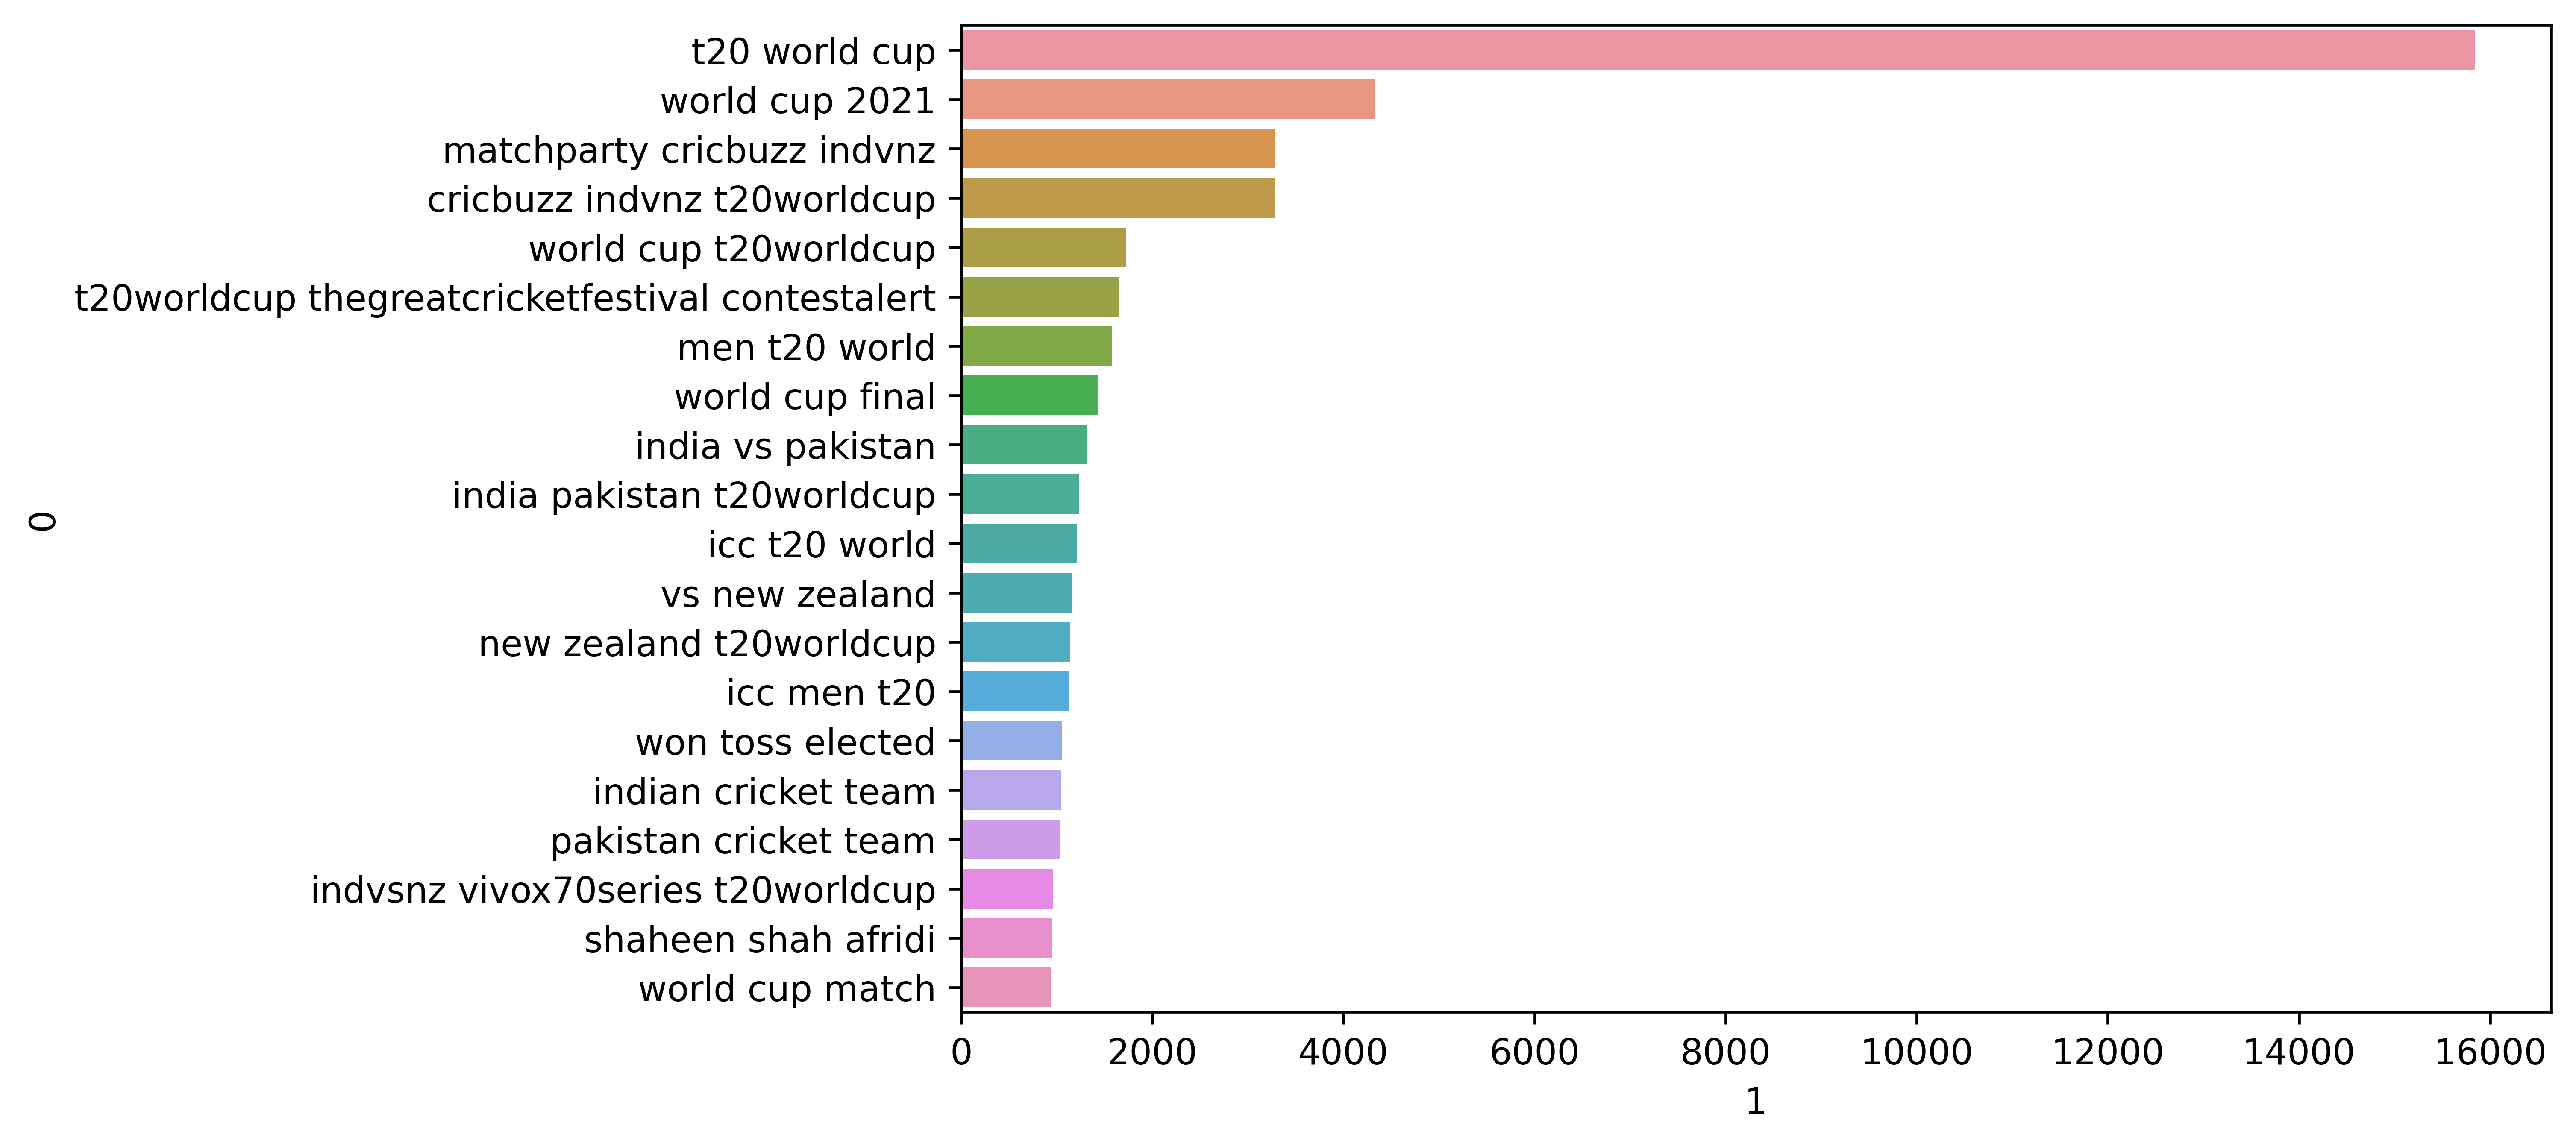

In [ ]:
# Function to ngram
def get_top_n_gram(corpus, ngram_range, n=None):
	vec = CountVectorizer(ngram_range=ngram_range,
						stop_words='english').fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
	return words_freq[:n]

# n2_bigram
n2_bigrams = get_top_n_gram(df['text'], (2, 2), 20)
plt.figure(figsize=(8, 5),
		dpi=600) # Push new figure on stack

sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n2_bigrams))
plt.savefig('bigram.jpg') # Save that figure

# n3_trigram
n3_trigrams = get_top_n_gram(df['text'], (3, 3), 20)

plt.figure(figsize=(8, 5),
		dpi=600) # Push new figure on stack

sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n3_trigrams))
plt.savefig('trigram.jpg') # Save that figure
